In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow

In [2]:
!pip install tqdm

In [3]:
import seaborn as sns
import cv2
from tqdm import tqdm

In [4]:
train = pd.read_csv('dataset/train.csv')
test = pd.read_csv('dataset/test.csv')

In [5]:
train.head()

,Image,target
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi


In [6]:
train['target'].unique()

array(['manipuri', 'bharatanatyam', 'odissi', 'kathakali', 'kathak',
       'sattriya', 'kuchipudi', 'mohiniyattam'], dtype=object)

In [7]:
Class_map={'manipuri':0, 'bharatanatyam':1, 'odissi':2 ,'kathakali':3, 'kathak':4, 'sattriya':5,
 'kuchipudi':6, 'mohiniyattam':7}
inverse_map={0:'manipuri', 1:'bharatanatyam', 2:'odissi' ,3:'kathakali',4: 'kathak', 5:'sattriya',
 6:'kuchipudi', 7:'mohiniyattam'}
train['target']=train['target'].map(Class_map)

In [8]:
train.head()

,Image,target
0,96.jpg,0
1,163.jpg,1
2,450.jpg,2
3,219.jpg,3
4,455.jpg,2


In [9]:
# train_img = []
# train_label = []
# j=0
# path = 'dataset/train/'
# for i in tqdm(train['Image']):
#     final_path = os.path.join(path,i)
#     img = cv2.imread(final_path)
#     img = cv2.resize(img,(128,128))
#     train_img.append(img)
#     train_label.append(train['target'][j])
#     j=j+1

In [10]:
# train_img = []
# train_label= []
# train_path = 'dataset/train/'
# for file in os.listdir(train_path):
#     final_path = os.path.join(train_path,file)
#     img = cv2.imread(final_path)
#     img = cv2.resize(img,(128,128))
#     for j in range(train.shape[0]):
#         if str(file) == train['Image'][j]:
#             train_img.append(img)
#             train_label.append(train['target'][j])

In [11]:
train_img = []
train_label = []
filename = []
training_path = 'dataset/train/'
for file in os.listdir(training_path):
  img = tensorflow.keras.preprocessing.image.load_img(os.path.join(training_path, file), target_size=[128, 128], interpolation='nearest')
  img = tensorflow.keras.preprocessing.image.img_to_array(img)
  for i in range(train.shape[0]):
    if str(file) == train['Image'][i]:
      filename.append(train['Image'][i])
      train_label.append(train['target'][i])
  train_img.append(img)



In [12]:
test_img = []
test_label = []
path = 'dataset/test/'
for i in tqdm(test['Image']):
    final_path = os.path.join(path,i)
    img = cv2.imread(final_path)
    img = cv2.resize(img,(128,128))
    test_img.append(img)


100%|██████████| 156/156 [00:01<00:00, 124.29it/s]


In [13]:
data = np.array(train_img)/255.0
data = np.reshape(data,(data.shape[0],128,128,3))
target = np.array(train_label)

In [14]:
from tensorflow.keras.utils import to_categorical
new_target = to_categorical(target)
print(new_target)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [16]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target = train_test_split(
    data,new_target,test_size=0.2,random_state=42
)

In [17]:
model = Sequential()
model.add(Conv2D(filters=100,kernel_size=(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))

model.add(Conv2D(filters=200,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))

model.add(Conv2D(filters=300,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(3,3)))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64,activation='relu'))
model.add(Dense(8,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 100)     2800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 42, 42, 100)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 40, 40, 200)       180200    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 200)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 300)       540300    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 300)         0         
_________________________________________________________________
flatten (Flatten)            (None, 2700)              0

In [19]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss',patience = 2)

In [20]:
model.fit(data,new_target,epochs=20,validation_data=(test_data,test_target))

Train on 364 samples, validate on 73 samples
Epoch 1/20
364/364 [==============================] - 13s 36ms/sample - loss: 2.1097 - accuracy: 0.1181 - val_loss: 2.0786 - val_accuracy: 0.1918
Epoch 2/20
364/364 [==============================] - 12s 32ms/sample - loss: 2.0739 - accuracy: 0.1401 - val_loss: 2.0615 - val_accuracy: 0.2055
Epoch 3/20
364/364 [==============================] - 12s 33ms/sample - loss: 2.0593 - accuracy: 0.1703 - val_loss: 2.0303 - val_accuracy: 0.1918
Epoch 4/20
364/364 [==============================] - 14s 39ms/sample - loss: 2.0012 - accuracy: 0.1951 - val_loss: 1.9842 - val_accuracy: 0.1644
Epoch 5/20
364/364 [==============================] - 13s 36ms/sample - loss: 1.9371 - accuracy: 0.2335 - val_loss: 1.8950 - val_accuracy: 0.2740
Epoch 6/20
364/364 [==============================] - 13s 36ms/sample - loss: 1.8573 - accuracy: 0.2885 - val_loss: 1.7444 - val_accuracy: 0.4247
Epoch 7/20
364/364 [==============================] - 14s 37ms/sample - loss: 1

In [21]:
model.evaluate(test_data,test_target)

73/73 [==============================] - 0s 7ms/sample - loss: 0.2708 - accuracy: 0.9315


[0.27077115194438256, 0.9315069]

In [22]:
metrices = pd.DataFrame(model.history.history)

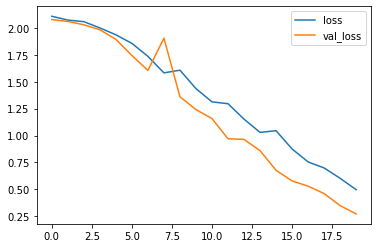

In [23]:
metrices[['loss','val_loss']].plot()

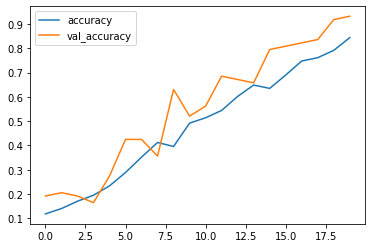

In [24]:
metrices[['accuracy','val_accuracy']].plot()

In [25]:
model.save('model.h5')

In [26]:
test_data = np.array(test_data)
prediction  = model.predict(test_data)

In [27]:
prediction =[np.argmax(i) for i in prediction]

In [28]:
test_case = np.array(test_img)
test_case_pred = model.predict_classes(test_case)

In [29]:
submission = pd.DataFrame({'Image': test.Image})
submission.to_csv('output.csv',index=False)

In [30]:
submission.head()

,Image
0,508.jpg
1,246.jpg
2,473.jpg
3,485.jpg
4,128.jpg


In [31]:
submission['target'] = test_case_pred

In [32]:
submission.head()

,Image,target
0,508.jpg,4
1,246.jpg,1
2,473.jpg,1
3,485.jpg,2
4,128.jpg,1


In [33]:
submission['target'] = submission['target'].map(inverse_map)

In [34]:
submission.head()

,Image,target
0,508.jpg,kathak
1,246.jpg,bharatanatyam
2,473.jpg,bharatanatyam
3,485.jpg,odissi
4,128.jpg,bharatanatyam


In [35]:
submission.to_csv('output.csv',index=False)

In [36]:
train_data = np.array(train_data)
prediction  = model.predict_classes(train_data)
prediction

array([5, 0, 2, 3, 3, 0, 1, 3, 1, 0, 3, 7, 2, 2, 4, 2, 4, 2, 1, 5, 2, 7,
       0, 7, 1, 7, 1, 5, 4, 0, 5, 4, 7, 6, 0, 4, 6, 4, 1, 7, 1, 7, 3, 6,
       1, 2, 3, 2, 7, 1, 1, 2, 5, 2, 6, 6, 5, 5, 1, 3, 7, 0, 4, 6, 0, 4,
       3, 3, 5, 2, 5, 6, 4, 7, 5, 3, 3, 6, 3, 5, 2, 3, 5, 3, 1, 1, 7, 5,
       3, 7, 2, 2, 0, 7, 7, 4, 3, 2, 5, 2, 7, 0, 5, 6, 1, 0, 7, 1, 0, 6,
       5, 3, 5, 4, 2, 7, 4, 0, 6, 4, 7, 5, 6, 7, 2, 0, 7, 5, 2, 6, 1, 2,
       5, 0, 7, 3, 2, 1, 3, 2, 3, 2, 6, 7, 5, 6, 1, 4, 3, 2, 3, 6, 3, 4,
       1, 1, 1, 7, 7, 5, 7, 6, 1, 7, 6, 1, 2, 4, 2, 5, 5, 7, 1, 3, 2, 5,
       7, 1, 0, 7, 6, 5, 0, 6, 6, 3, 6, 4, 5, 7, 3, 5, 1, 0, 1, 1, 5, 2,
       1, 2, 4, 1, 5, 2, 7, 3, 7, 7, 0, 4, 1, 7, 4, 4, 2, 4, 2, 2, 6, 5,
       5, 4, 6, 0, 4, 6, 5, 7, 1, 1, 5, 6, 3, 1, 5, 1, 4, 5, 1, 6, 3, 1,
       6, 6, 1, 2, 4, 2, 7, 0, 7, 2, 0, 4, 6, 1, 1, 5, 5, 0, 5, 7, 1, 4,
       6, 6, 1, 2, 4, 2, 5, 0, 0, 6, 2, 7, 4, 4, 3, 3, 4, 5, 7, 0, 1, 5,
       3, 3, 6, 4, 3], dtype=int64)